<a href="https://colab.research.google.com/github/Samuel-Mason-git/Recent-Projects/blob/main/Single_Multi_Linear_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression / Multi Linear Regression / Random Forests - Indian House Pricing
 A comparison of simple linear regression, multi-linear regression and ensemble methods like Random Forests for predicting housing prices. This project highlights data preprocessing, feature selection, and model evaluation using RMSE and R² metrics.


*    Dependant Variable - Amount in Rupees (House Pricing)

---

**Preprocessing**

  *   Understanding Our Data
  *   Preprocessing
     *   Data Manipulation
     *   Feature Engineering
     *   Numerical Encoding
     *   Normalisation
     *   TF-IDF vectorisation
     *   Dataframe Splitting
---

**Basic Linear Regression**



*  Calculating the correlation between each feature and the dependent variable (House Pricing)

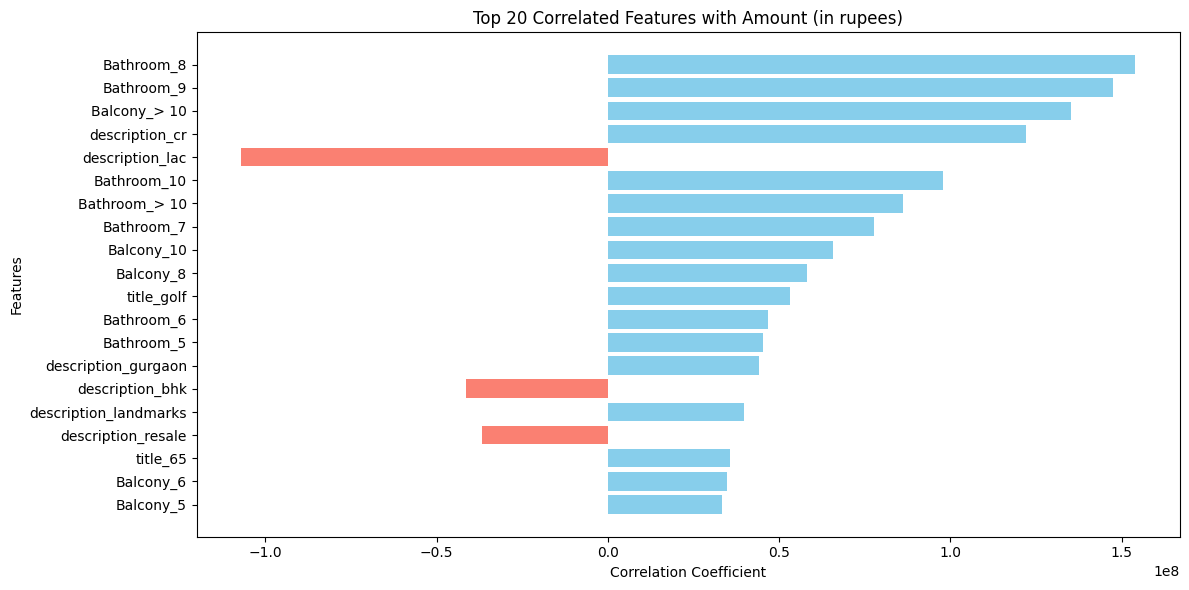

*   The features Bathroom_8, Bathroom_9, and Balcony_>10 show the highest absolute correlation with the target variable Amount(in rupees). These features seem to have a substantial impact on the dependent variable.



Top Descriptive Predictors:


*   Descriptive features like description_cr and description_lac are also strong predictors, suggesting that the presence of certain keywords in descriptions correlates with higher property values.


Incremental Trends:
*   There is a trend where the count of amenities (Bathroom_8, Bathroom_9, etc.) aligns well with higher property prices, which makes logical sense since larger properties with more amenities tend to be priced higher.


Potential for Feature Engineering:

*   The multiple features for bathrooms, balconies, and other similar amenities could be grouped or combined into a single feature (e.g., Total_Amenities) to simplify analysis and potentially improve model performance.

---

**Multi-Linear Regression**
A multiple linear regression model was implemented using the top 30 features most correlated with the target variable. Features were selected from a correlation matrix and used as predictors (X_top), with the target variable being log-transformed for better model performance.

*   Resulting Mean Squared Error: 0.2718
*   Resulting R-Squared: 0.5801, indicating that approximately 58% of the variance in the target variable is explained by the model.

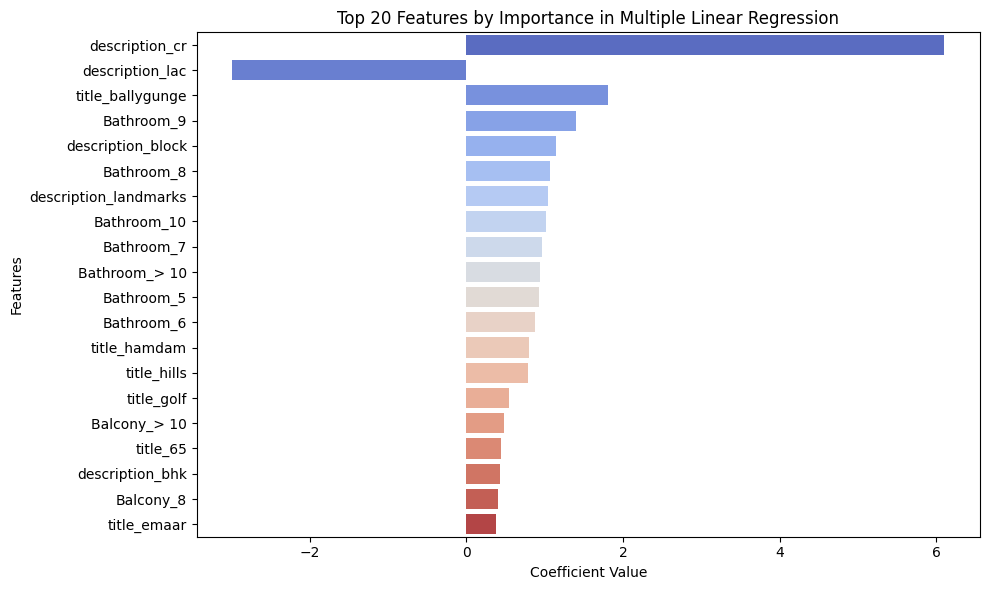

Feature Importance:
Features were ranked by absolute importance to highlight the strongest *   predictors regardless of direction (positive or negative).
Top contributors (based on coefficients):
*   description_cr: Strong positive impact (coefficient: 6.1055).
*   description_lac: Strong negative impact (coefficient: -2.9867).
*   title_ballygunge: Moderate positive impact (coefficient: 1.8074).

Residuals
*   The residual plot (residuals vs. predicted values) shows no clear patterns, meaning the model likely meets the assumption of linearity and captures the relationship between predictors and the target reasonably well.
*   Most predicted values align well with the actual values, indicating the model is making fairly accurate predictions.
---

**Regression Evaluation**

*   Model Strengths:

Multi-linear regression effectively identifies key predictors and provides interpretable coefficients for each feature.
The analysis confirms the logical relationship between amenities and house pricing, validating the dataset's integrity.
*   Limitations:

An R² of 0.58 suggests that other factors influencing house prices remain unexplored. These could include location-based variables, macroeconomic indicators, or non-linear interactions.
The reliance on linear models limits the ability to capture complex, non-linear relationships in the data.

---

**Random Forest**

Random Forest is an ensemble learning method that uses multiple decision trees to make predictions by averaging their outputs, effectively capturing complex, non-linear relationships between features and the target variable (house prices).
*   We utilised a non transformed dependant variable and the full variables of the dataframe to use Random Forest to capture non linear relationships.
*   Resulting Mean Squared Error: 0.42
*   Resulting R-Squared: 0.73, indicating that approximately 73% of the variance in the target variable is explained by the model.

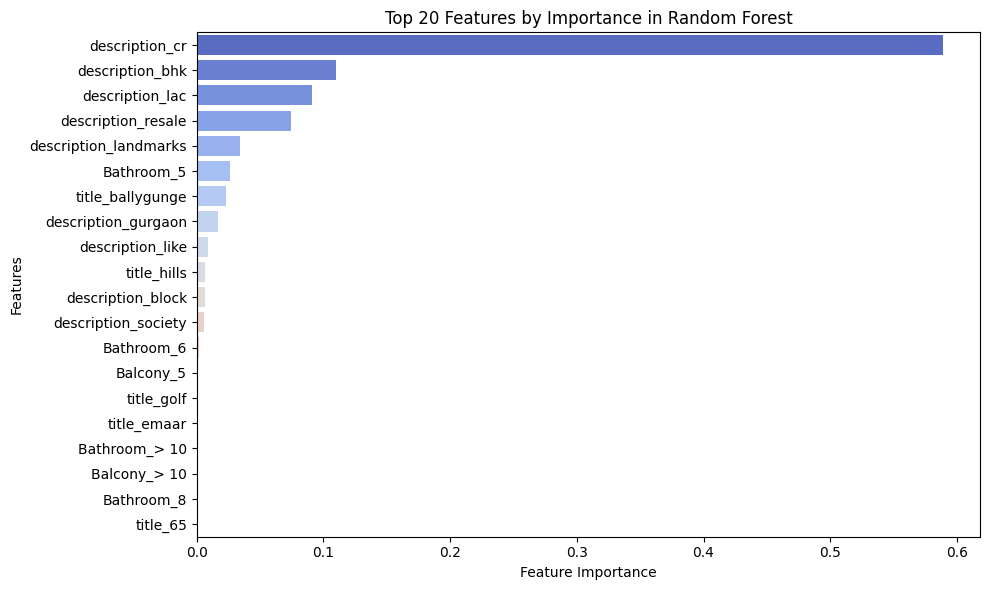

Evaluation of Results
1. Model Performance
  *   The Random Forest model performed significantly better than your basic linear regression and multi-linear regression models in terms of both R-Squard and RMSE.
  *   The higher R-Squared shows that Random Forest captures non-linear relationships and interactions between features more effectively.
  *   The non-linear regression highlighted a more significant relationship between TF-IDF description elements than the actual ammenitites of the house listing.

2. Key Insights
  *   The most important features (description_cr, description_bhk, description_lac, description_resale, etc.) are derived from the descriptions of property listings rather than numerical or categorical features such as Bathroom_5 or Balcony_5.
  *   This indicates that text-based information in property descriptions is a stronger predictor of house prices than physical amenities. This insight should guide future improvements in the dataset or model.  




In [29]:
#!kaggle datasets download juhibhojani/house-price
#!unzip /content/house-price.zip

Dataset URL: https://www.kaggle.com/datasets/juhibhojani/house-price
License(s): Community Data License Agreement - Sharing - Version 1.0
house-price.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/house-price.zip
replace house_prices.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [30]:
import tensorflow as tf
import pandas as pd
import numpy as np

## Understanding Our Data


*   CSV consists of 187531 Rows and 21 Columns
*   Dataset contains a large amount of NAN values
*   All columns are objects (Mixture of data types) apart from price which is a float.






In [31]:
df = pd.read_csv('/content/house_prices.csv')
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [33]:
print(f"NA values in Dataframe:")
print(df.isna().sum())

print(f"\nData Types of columnns:")
print(df.dtypes)

print(f"\nTotal Number of DF entries: {len(df)}")

print(f"\nNumber of unique entries in each colunn:")
print(df.nunique())

NA values in Dataframe:
Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
                      ...  
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
Length: 21, dtype: int64

Data Types of columnns:
Index                  int64
Title                 object
Description           object
Amount(in rupees)     object
Price (in rupees)    float64
                      ...   
Car Parking           object
Ownership             object
Super Area            object
Dimensions           float64
Plot Area            float64
Length: 21, dtype: object

Total Number of DF entries: 187531

Number of unique entries in each colunn:
Index                187531
Title                 32446
Description           65634
Amount(in rupees)      1561
Price (in rupees)     10958
                      ...  
Car Parking             229

## Preprocessing








### Removing Redundant Columns
*   Columns: 'Plot Area', 'Dimensions', 'Super Area', 'Car Parking', 'Society' all contain over 100k NAN values and will be removed
*   Column 'status' contains one unique value and will not provide insight to the model, so will be removed.
*   'Price (in rupees)' is also redundant as the dependant variable is the amount in rupees, this pricing data doesnt provide new information as the larger the price the larger the amount by default.

In [34]:
# Dropping redundant Columns
df.drop(['Plot Area', 'Dimensions', 'Super Area', 'Car Parking', 'Society', 'Index', 'Price (in rupees)'], axis=1, inplace=True) #Index also is not needed as Pandas provides an Index
df.drop('Status', axis=1, inplace=True)

### Replacing NAN values
*   'Balcony' represents integers above 0 for any quantity of balconies, 0s can be used instead of NA values.
*   'Ownership' column contains 4 unique values, 'Freehold' represents 112229/187531 of these, for an ease of assumption we will assume the NAN values in 'Onwership' are 'Freehold' ownership types.
*   'Bathroom' contains 11 differnet unique values representing integers larger than 1, for this purpose we will consider all NAN values as properties with 0 bathrooms for assumption.
*   'overlooking' represents what the property is overlooking, as the distributions of overlooking are spread over numerous unique values, we will classify any NAN values as an 'Unknown' string value to keep the columns but categorise them into a different segment incase they do represent something different.
*   'facing's unique value distribution is mainly dominated by east facing properties, so NAN values will take the assumption they are also east facing.
*   'Furnishing' also is mainly distributed to Semi-Furnished and Unfurnished, only containing 2897/187531 NAN values so these NAN values will take the assumption of being 'Semi-Furnished'.
*   'Transaction' also is mainly distributed as 'Resale' with 144172 entries represented as 'Resale'. Additionally, 83/187531 NAN values were found so these NAN values will take the assumption of being 'Resale'.

In [35]:
df['Balcony'] = df['Balcony'].fillna(0)
df['Ownership'] = df['Ownership'].fillna('Freehold')
df['Bathroom'] = df['Bathroom'].fillna(0)
df['overlooking'] = df['overlooking'].fillna('Unknown')
df['facing'] = df['facing'].fillna('East')
df['Furnishing'] = df['Furnishing'].fillna('Semi-Furnished')
df['Transaction'] = df['Transaction'].fillna('Resale')

### Data Manipulation for Preprocessing
*   'Floor' represents the floor the property is on, this was turned into a ratio to normalise and still represent the data. Any basement or below ground properties were represented by -1, and then top floors represented by 1, ratios represented any floors inbetween and any NAN values were set to 0, and any values whos numerator was larger than the denominator were set to 1.
*   Forms of measurement found for Carpet Area: {'bigha', 'cent', 'ground', 'sqyrd', 'marla', 'acre', 'sqft', 'sqm', 'kanal'}. To standardise the measurement format all entries were converted to square feet and the remaining NA values were given values of the averaged amount of SQFT from the properties that data was available for.
*   'Amount in Rupees' is converted to a standardised Rupees amount with Lac coverted to * 100000 and Cr converted to * 10000000, any NA values are converted to the average amount for simplicity reasons.


In [36]:
# Dealing with string floor values and converting to numerical representation
def Floor_sort(string):
    try:
        if isinstance(string, str):
            split = string.split(' ')

            if 'Ground' in string:
                return 0

            elif 'Lower' in string:
              try:
                return int(split[-1])
              except:
                return -1

            elif 'Upper' in string:
                return -1

            elif split[0] == split[-1]:
                return 1

            elif split[0].isdigit() and split[-1].isdigit():
                numerator = int(split[0])
                denominator = int(split[-1])
                if numerator > denominator:
                    print(f"Invalid Floor Ratio: {string} - Setting to 1")
                    return 1
                else:
                  answer = float(numerator / denominator)
                  if answer > 1:
                    return 1
                  else:
                    return answer

        elif isinstance(string, int):
            print(f"Float Found: {string}")
            return 0

        elif isinstance(string, float):
            if np.isnan(string):
                return 0
            else:
                print(f"Float Found: {string}")
                return 0


    except:
      return 0

df['Floor'] = df['Floor'].apply(Floor_sort)
df['Floor'] = df['Floor'].apply(lambda x: 1 if x > 1 else x)

Invalid Floor Ratio: 3 out of 1 - Setting to 1
Invalid Floor Ratio: 3 out of 2 - Setting to 1
Invalid Floor Ratio: 6 out of 2 - Setting to 1
Invalid Floor Ratio: 4 out of 2 - Setting to 1
Invalid Floor Ratio: 2 out of 1 - Setting to 1
Invalid Floor Ratio: 4 out of 3 - Setting to 1


In [37]:
checking = set()

for value in df['Carpet Area']:
  if isinstance(value, str):
      column_split = value.split(' ')
      checking.add(column_split[-1])

print(f"Forms of measurement for Carpet Area: {checking}")

def Remove_sqft(string): # Standardise measurement to square feet
  if isinstance(string, str):
    string = string.lower().strip()

    if ' sqft' in string:
      string = string.replace(' sqft', '')
      #print(f"Converting sqft to sqft")
      return float(string)

    elif ' bigha' in string:
      string = string.replace(' bigha', '')
      #print(f"Converting bigha to sqft")
      return float(string) * 27000 # rough approximation

    elif ' cent' in string:
      string = string.replace(' cent', '')
      #print(f"Converting cent to sqft")
      return float(string) * 435.60  # rough approximation

    elif ' ground' in string:
      string = string.replace(' ground', '')
      #print(f"Converting ground to sqft")
      return float(string) * 2400   # rough approximation

    elif ' sqyrd' in string:
      string = string.replace(' sqyrd', '')
      #print(f"Converting sqyrd to sqft")
      return float(string) * 9

    elif ' marla' in string:
      string = string.replace(' marla', '')
      #print(f"Converting marla to sqft")
      return float(string) * 272.251

    elif ' kanal' in string:
      string = string.replace(' kanal', '')
      #print(f"Converting kanal to sqft")
      return float(string) * 5445

    elif ' acre' in string:
      string = string.replace(' acre', '')
      #print(f"Converting acre to sqft")
      return float(string) * 43560

    elif ' sqm' in string:
      string = string.replace(' sqm', '')
      #print(f"Converting sqm to sqft")
      return float(string) * 10.7639

    else:
      print(f"String Found With No Measurement: {string}")
  else:
    return string

# Standardise Carpet Area to SQFT
df['Carpet Area'] = df['Carpet Area'].apply(Remove_sqft)

# Replace the remaining NA values with the average property size
average = df['Carpet Area'].mean()
df['Carpet Area'] = df['Carpet Area'].fillna(average)

Forms of measurement for Carpet Area: {'sqft', 'cent', 'acre', 'sqm', 'sqyrd', 'ground', 'bigha', 'kanal', 'marla'}


In [38]:
# Function to convert amounts to rupees
def convert_to_rupees(amount):
  if isinstance(amount, str):
    if 'lac' in amount.lower():
        return float(amount.replace(' Lac', '').strip()) * 100000
    elif 'cr' in amount.lower():
        return float(amount.replace(' Cr', '').strip()) * 10000000
  else:
        return float(amount)

df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_to_rupees)
average = df['Amount(in rupees)'].mean()
df['Amount(in rupees)'] = df['Amount(in rupees)'].fillna(average)

### Numerical Encoding


*   'Location', 'Transaction', 'Furnishing', 'Facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership' are all small enough in unique values and are Nominal data, so these columns were one hot encoded to numerically represent the categorical data.

After one-hot-encoding and standardising the dataframe is left as: Data Types of columnns:
bool       144. - float64      4. - object       2.

In [39]:
df = pd.get_dummies(df, columns=['location', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony', 'Ownership'], drop_first=False)
# Features with Nominal data and small enough quantity of unique labels to one hot encode

### Normalising Columns

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['Floor', 'Carpet Area']] = scaler.fit_transform(df[['Floor', 'Carpet Area']])
print(df[['Floor', 'Carpet Area']].describe())


               Floor    Carpet Area
count  187531.000000  187531.000000
mean        0.752574       0.000035
std         0.155921       0.002772
min         0.000000       0.000000
25%         0.625000       0.000015
50%         0.750000       0.000028
75%         0.875000       0.000035
max         1.000000       1.000000


In [41]:
print(f"NA values in Dataframe:")
print(df.isna().sum())

print(f"\nData Types of columnns:")
print(df.dtypes)

print(f"\nTotal Number of DF entries: {len(df)}")

print(f"\nNumber of unique entries in each colunn:")
print(df.nunique())

column_data_types = df.dtypes
data_type_counts = column_data_types.value_counts()
print(f"\nData Types of columnns:")
print(data_type_counts)

NA values in Dataframe:
Title                                0
Description                       3023
Amount(in rupees)                    0
Carpet Area                          0
Floor                                0
                                  ... 
Balcony_> 10                         0
Ownership_Co-operative Society       0
Ownership_Freehold                   0
Ownership_Leasehold                  0
Ownership_Power Of Attorney          0
Length: 149, dtype: int64

Data Types of columnns:
Title                              object
Description                        object
Amount(in rupees)                 float64
Carpet Area                       float64
Floor                             float64
                                   ...   
Balcony_> 10                         bool
Ownership_Co-operative Society       bool
Ownership_Freehold                   bool
Ownership_Leasehold                  bool
Ownership_Power Of Attorney          bool
Length: 149, dtype: object

Total 

In [42]:
for column in df.columns:
    if df[column].dtype == 'bool':  # Check if the column is of boolean type
        df[column] = df[column].astype(float)

In [43]:
column_data_types = df.dtypes
data_type_counts = column_data_types.value_counts()
print(f"\nData Types of columnns:")
print(data_type_counts)


Data Types of columnns:
float64    147
object       2
Name: count, dtype: int64


### TF-IDF vectorisation
For the title and description columns to numerically resemble any requent terms.



*   'Title' and 'Description' are both text based representations with 32446 unique entries for Title and 656634 for Description.
*   NAN values in 'Description' were replaced with a simple 'Empty' string so we can model that these desceriptions did not include any data whilst removing NAN values.
*  'Title' is transformed into a vector of numerical representation of 100 features for each item in title.
*  'Description' is transformed into a vector of numerical representation of 200 features for each item in title.
* Title and Description dataframes contain 100 variables and 200 variables for all 187531 entries.



In [44]:
df['Description'] = df['Description'].fillna('Empty')


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title = TfidfVectorizer(max_features=100, stop_words='english')
vectorizer_description = TfidfVectorizer(max_features=200, stop_words='english')

X_title = vectorizer_title.fit_transform(df['Title'])
X_description = vectorizer_description.fit_transform(df['Description'])

title_df = pd.DataFrame(X_title.toarray(), columns=[f"title_{name}" for name in vectorizer_title.get_feature_names_out()])
description_df = pd.DataFrame(X_description.toarray(), columns=[f"description_{name}" for name in vectorizer_description.get_feature_names_out()])

print(f"Shape of Dataframe before TF-IDF vevtorisation: {df.shape}")
print(f"Shape of Title Dataframe: {title_df.shape}")
print(f"Shape of Description Dataframe: {description_df.shape}")

df = pd.concat([df, title_df, description_df], axis=1)
df.drop(['Title', 'Description'], axis=1, inplace=True)

Shape of Dataframe before TF-IDF vevtorisation: (187531, 149)
Shape of Title Dataframe: (187531, 100)
Shape of Description Dataframe: (187531, 200)


In [45]:
print(f"Shape of Dataframe after concatenation: {df.shape}")

Shape of Dataframe after concatenation: (187531, 447)


In [46]:
print(f"NA values in Dataframe:")
print(df.isna().sum())

print(f"\nData Types of columnns:")
print(df.dtypes)

print(f"\nTotal Number of DF entries: {len(df)}")

print(f"\nNumber of unique entries in each colunn:")
print(df.nunique())

NA values in Dataframe:
Amount(in rupees)       0
Carpet Area             0
Floor                   0
location_agra           0
location_ahmadnagar     0
                       ..
description_uniquely    0
description_valuable    0
description_various     0
description_vihar       0
description_west        0
Length: 447, dtype: int64

Data Types of columnns:
Amount(in rupees)       float64
Carpet Area             float64
Floor                   float64
location_agra           float64
location_ahmadnagar     float64
                         ...   
description_uniquely    float64
description_valuable    float64
description_various     float64
description_vihar       float64
description_west        float64
Length: 447, dtype: object

Total Number of DF entries: 187531

Number of unique entries in each colunn:
Amount(in rupees)       1560
Carpet Area             2592
Floor                    490
location_agra              2
location_ahmadnagar        2
                        ... 
descript

### Creating dependant and independant variable dataframes


In [47]:
y = df['Amount(in rupees)']

X = df.drop(['Amount(in rupees)'], axis=1)

print(f"Shape of X: {X.shape}")
print(f"Max value in X: {X.max()}")
print(f"Min value in X: {X.min()}")

Shape of X: (187531, 446)
Max value in X: Carpet Area             1.000000
Floor                   1.000000
location_agra           1.000000
location_ahmadnagar     1.000000
location_ahmedabad      1.000000
                          ...   
description_uniquely    0.366822
description_valuable    0.418478
description_various     0.604582
description_vihar       0.859739
description_west        1.000000
Length: 446, dtype: float64
Min value in X: Carpet Area             0.0
Floor                   0.0
location_agra           0.0
location_ahmadnagar     0.0
location_ahmedabad      0.0
                       ... 
description_uniquely    0.0
description_valuable    0.0
description_various     0.0
description_vihar       0.0
description_west        0.0
Length: 446, dtype: float64


In [48]:
print(f"Shape of y: {y.shape}")
print(f"Max value in y: {y.max()}")
print(f"Min value in y: {y.min()}")

Shape of y: (187531,)
Max value in y: 14003000000.0
Min value in y: 100000.0


## Basic Linear Regression
Running a Linear Regression for each variable and the dependant variable some key observations were highlighted:


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

model = LinearRegression()
correlation_dict = {}

for column in X.columns:
    X_column_reshaped = X[[column]].values.reshape(-1, 1)
    model.fit(X_column_reshaped, y)
    correlation_dict[column] = model.coef_[0]

correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlation Coefficient'])

correlation_df['abs_correlation'] = correlation_df['Correlation Coefficient'].abs()
correlation_df = correlation_df.sort_values(by='abs_correlation', ascending=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
print(correlation_df.head(50))

                   Feature  Correlation Coefficient  abs_correlation
127             Bathroom_8             1.539487e+08     1.539487e+08
128             Bathroom_9             1.473364e+08     1.473364e+08
141           Balcony_> 10             1.352658e+08     1.352658e+08
298         description_cr             1.221389e+08     1.221389e+08
349        description_lac            -1.069675e+08     1.069675e+08
..                     ...                      ...              ...
302      description_delhi             1.862797e+07     1.862797e+07
345     description_jaipur            -1.809896e+07     1.809896e+07
366     description_market             1.743227e+07     1.743227e+07
393      description_prime             1.722432e+07     1.722432e+07
284  description_carefully             1.681301e+07     1.681301e+07

[50 rows x 3 columns]


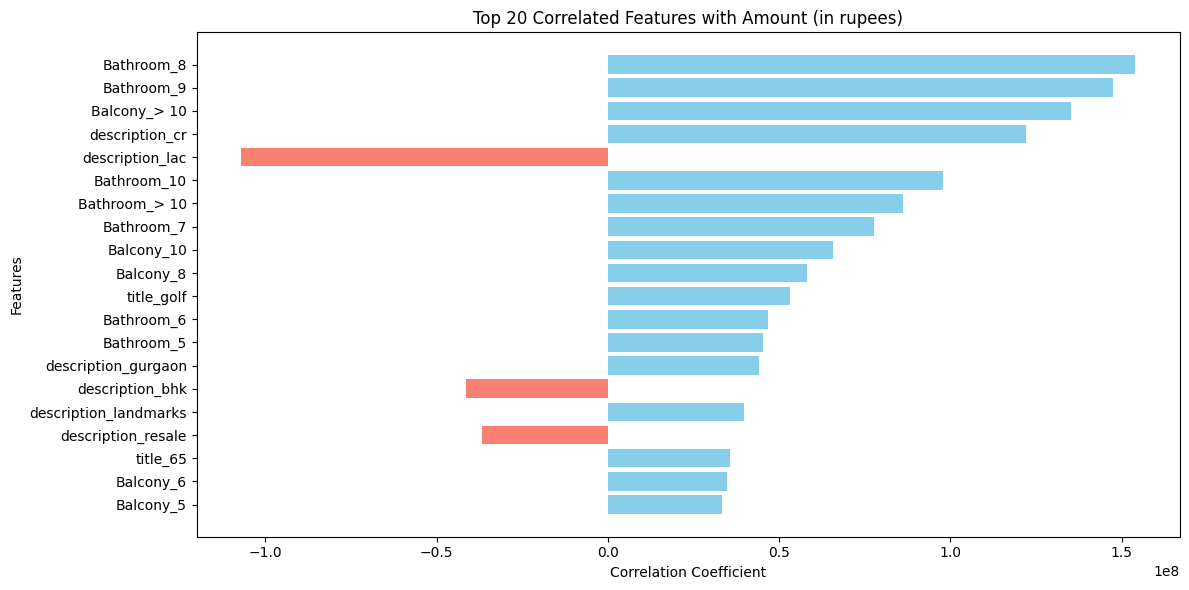

In [50]:
top_features = correlation_df.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Correlation Coefficient'],
         color=top_features['Correlation Coefficient'].apply(lambda x: 'skyblue' if x > 0 else 'salmon'))
plt.gca().invert_yaxis()
plt.title('Top 20 Correlated Features with Amount (in rupees)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Multi-Linear Regression
A multiple linear regression model was implemented using the top 30 features most correlated with the target variable. Features were selected from a correlation matrix and used as predictors (X_top), with the target variable being log-transformed for better model performance.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

top_features = correlation_df['Feature'].head(30).tolist()
X_top = X[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_top, (np.log1p(y)), test_size=0.2, random_state=42)
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train, y_train)
y_pred = multi_linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


feature_importance = pd.DataFrame({
    'Feature': X_top.columns,
    'Coefficient': multi_linear_model.coef_
})


feature_importance['Absolute Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

print(feature_importance)


Mean Squared Error (MSE): 0.271828371752449
R-squared (R²): 0.580070648992876
              Feature  Coefficient  Absolute Importance
3      description_cr     6.105525             6.105525
4     description_lac    -2.986715             2.986715
22   title_ballygunge     1.807353             1.807353
1          Bathroom_9     1.400279             1.400279
25  description_block     1.140983             1.140983
..                ...          ...                  ...
18          Balcony_6     0.120317             0.120317
19          Balcony_5     0.119326             0.119326
20          Balcony_7     0.083983             0.083983
26   description_like     0.045113             0.045113
29      title_emerald    -0.020432             0.020432

[30 rows x 3 columns]


<ipython-input-54-2415d8cad19b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


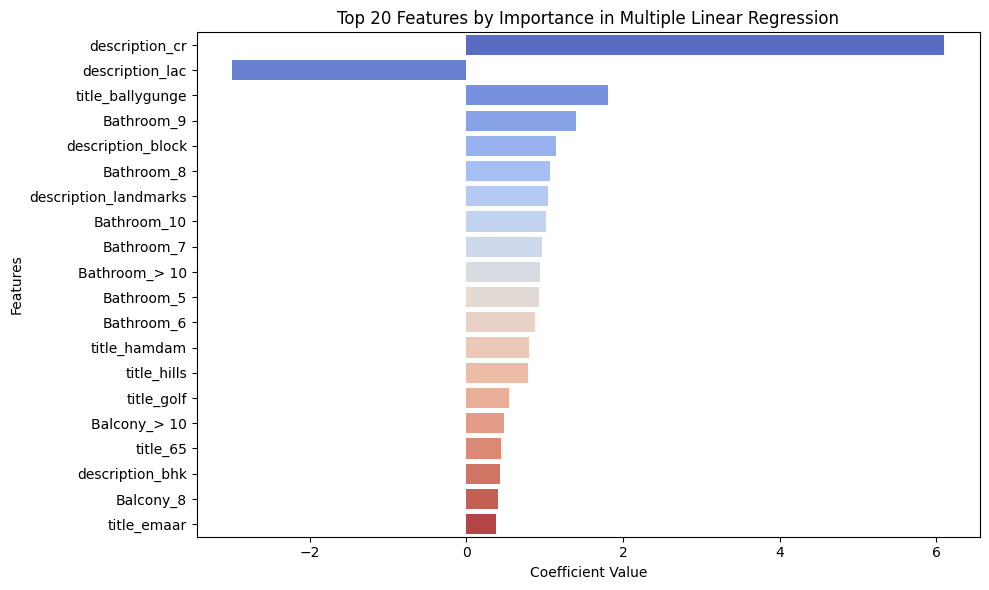

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=feature_importance.head(20),
    palette='coolwarm'
)
plt.title('Top 20 Features by Importance in Multiple Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

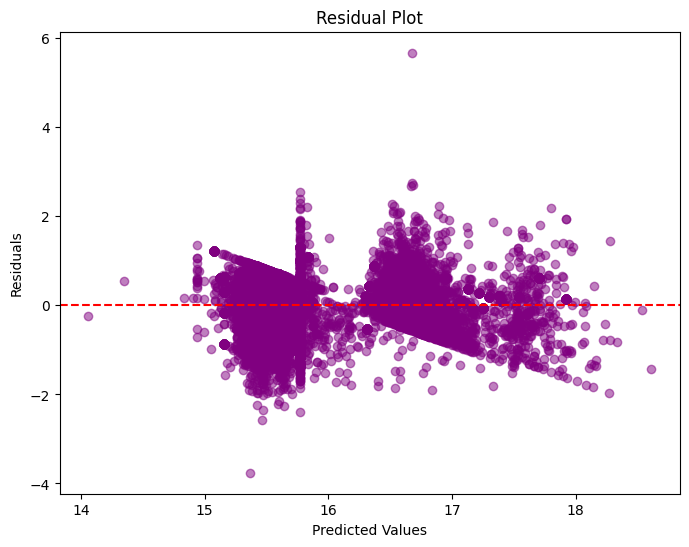

In [55]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Random Forests

In [64]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 0.42049987819182033
R²: 0.7268424582361248


                  Feature  Importance
3          description_cr    0.588803
14        description_bhk    0.109989
4         description_lac    0.091328
16     description_resale    0.074172
15  description_landmarks    0.034095
12             Bathroom_5    0.026425
22       title_ballygunge    0.023007
13    description_gurgaon    0.016406
26       description_like    0.008768
24            title_hills    0.006463
25      description_block    0.006294
21    description_society    0.005684
11             Bathroom_6    0.001828
19              Balcony_5    0.001199
10             title_golf    0.001110
23            title_emaar    0.000893
6           Bathroom_> 10    0.000574
2            Balcony_> 10    0.000482
0              Bathroom_8    0.000429
17               title_65    0.000396


<ipython-input-66-35be9981c452>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


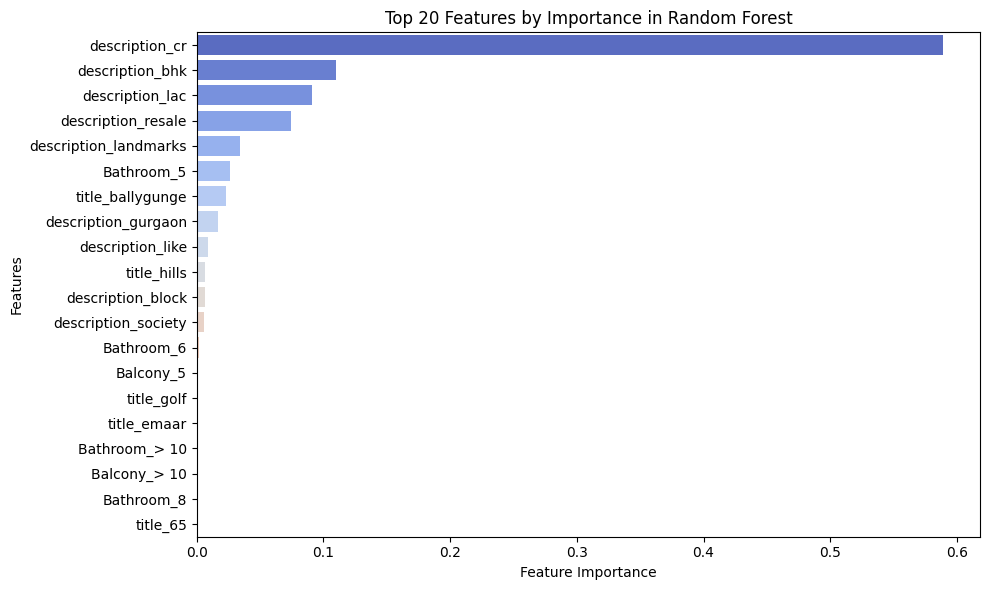

In [66]:
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_rf.head(20))

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_rf.head(20),
    palette='coolwarm'
)

plt.title('Top 20 Features by Importance in Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
